In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from jax import config
config.update("jax_enable_x64", True)

In [4]:
from opentn.transformations import create_kitaev_liouvillians, super2ortho, create_trotter_layers
from opentn.stiefel import gradient_stiefel_vec, riemannian_hessian_vec, retract_stiefel
from opentn.optimization import frobenius_norm, model_stiefel_local, get_kitaev_trotter_local_ansatz
from opentn.trust_region_rcopt import riemannian_trust_region_optimize


d, N, gamma = 2, 4, 1
Lvec, Lvec_odd, Lvec_even, Lnn = create_kitaev_liouvillians(N=N, d=d, gamma=gamma, pbc=True)

tau = 0.5
exp_Lvec_4, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_4)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

xs_rank4 = [super2ortho(x.real, rank=4) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

# Rank 4

In [5]:
xs_rank4_opt, f_rank4_opt, radius_rank4_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263228e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.866579378716822e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.4174538687802225e-05
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.163272286924188e-05
radius 0.000625
iteration: 6
c

In [10]:
xs_rank4_opt_2, f_rank4_opt_2, radius_rank4_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4_opt[-1], save_x=False, niter=10, radius_init=radius_rank4_opt
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.6021440346776207e-05
radius 0.00125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.5070424941986494e-05
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.135968906698574e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.135968906698574e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.0572408773121714e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.8867989198990007e-05
radius 0.0003125
iteration

In [71]:
xs_rank4_opt_3, f_rank4_opt_3, radius_rank4_opt_3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4_opt_2[-1], save_x=False, niter=10, radius_init=radius_rank4_opt_2
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.6621988350736598e-05
rho: 0.7475710515299753 updated radius: 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.6101596164444708e-05
rho: 1.1445248035470166 updated radius: 0.00125
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.483173958494518e-05
rho: -2.2872066065464582 updated radius: 0.0003125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.483173958494518e-05
rho: 1.1513487278140195 updated radius: 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.4330276522232682e-05
rho: 0.7470949080252748 updated radius: 0.000625
iteration: 5
column : 0
column : 1
column : 2


In [86]:
xs_rank4_opt_4, f_rank4_opt_4, radius_rank4_opt_4 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank4_opt_3[-1], save_x=False, niter=10, radius_init=radius_rank4_opt_3
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.2339055575032902e-05
rho: -4.280679833806906 updated radius: 0.0003125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.2339055575032902e-05
rho: 1.0102153270644822 updated radius: 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.223530843105286e-05
rho: 0.33025418787135535 updated radius: 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.218609769812376e-05
rho: 1.0401234901936964 updated radius: 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.1961176392923368e-05
rho: 0.35050119706086286 updated radius: 0.00125
iteration: 5
column : 0
column : 1
column : 2


# Rank 8

In [43]:
xs_rank8 = [super2ortho(x.real, rank=8) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

In [45]:
xs_rank8_opt, f_rank8_opt, radius_rank8_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.8438378119771665e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.451602517385625e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.158570313815291e-05
radius 0.00125
iteration: 6


In [50]:
xs_rank8_opt_2, f_rank8_opt_2, radius_rank8_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8_opt[-1], save_x=False, niter=10, radius_init=radius_rank8_opt
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.4535744858951496e-05
radius 0.00125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.2031406141615014e-05
radius 0.0003125
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.2031406141615014e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.0445621197321244e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.9621450280771487e-05
radius 0.0003125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.9312314582195813e-05
radius 0.000625
iter

In [74]:
xs_rank8_opt_3, f_rank8_opt_3, radius_rank8_opt_3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8_opt_2[-1], save_x=False, niter=10, radius_init=radius_rank8_opt_2
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.3749087208211866e-05
rho: 0.8460691816929622 updated radius: 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.2727003028107707e-05
rho: 0.42529262700012666 updated radius: 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.255143419264146e-05
rho: 0.9458472994698223 updated radius: 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.2081067627549385e-05
rho: -1.9782647020580422 updated radius: 0.0003125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.2081067627549385e-05
rho: 0.9306638411127817 updated radius: 0.000625
iteration: 5
column : 0
column : 1
column : 

In [91]:
xs_rank8_opt_4, f_rank8_opt_4, radius_rank8_opt_4 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank8_opt_3[-1], save_x=False, niter=10, radius_init=radius_rank8_opt_3
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.16507501096833e-05
rho: -37.31792948070078 updated radius: 0.0003125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.16507501096833e-05
rho: 0.5208737663694776 updated radius: 0.0003125
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.1644487386100416e-05
rho: 1.114483147945619 updated radius: 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.1630776247914598e-05
rho: -19.20251563207778 updated radius: 0.00015625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.1630776247914598e-05
rho: 0.8842454882874603 updated radius: 0.0003125
iteration: 5
column : 0
column : 1
column : 2

# Rank 16

In [53]:
xs_rank16 = [super2ortho(x.real, rank=16) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

In [55]:
xs_rank16_opt, f_rank16_opt, radius_rank16_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16, save_x=False, niter=5
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658263572e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.8653785234652965e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.441391770038193e-05
radius 0.00125


In [57]:
xs_rank16_opt_2, f_rank16_opt_2, radius_rank16_opt_2 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16_opt[-1], save_x=False, niter=5, radius_init=radius_rank16_opt
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.2186704077237626e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.8095806922925275e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.8095806922925275e-05
radius 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.61539547126842e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.52913895318953e-05
radius 0.00125


In [61]:
xs_rank16_opt_3, f_rank16_opt_3, radius_rank16_opt_3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16_opt_2[-1], save_x=False, niter=5, radius_init=radius_rank16_opt_2
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.2561954074803626e-05
radius 0.0003125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.2561954074803626e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.1209075435681226e-05
radius 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.0379262955424347e-05
radius 0.0003125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 3.0379262955424347e-05
radius 0.000625


In [64]:
xs_rank16_opt_4, f_rank16_opt_4, radius_rank16_opt_4 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16_opt_3[-1], save_x=False, niter=5, radius_init=radius_rank16_opt_3
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.9289006593855226e-05
radius 0.00125
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.83518641181683e-05
radius 0.0003125
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.83518641181683e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.745246401404119e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 2.6826605095488262e-05
radius 0.0003125


In [78]:
xs_rank16_opt_5, f_rank16_opt_5, radius_rank16_opt_5 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16_opt_4[-1], save_x=False, niter=10, radius_init=radius_rank16_opt_4
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.6826605095488262e-05
rho: 1.0222579775076182 updated radius: 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.5801105284215498e-05
rho: 0.7159171565759835 updated radius: 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.5354157665134368e-05
rho: 1.1493327789283372 updated radius: 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.4165196138908446e-05
rho: 1.2233081096658265 updated radius: 0.0025
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.3497418707703694e-05
rho: -17.748382140525894 updated radius: 0.000625
iteration: 5
column : 0
column : 1
column : 2
c

In [93]:
xs_rank16_opt_6, f_rank16_opt_6, radius_rank16_opt_6 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_rank16_opt_5[-1], save_x=False, niter=10, radius_init=radius_rank16_opt_5
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x0): 2.1967243429569845e-05
rho: 0.7627906081669638 updated radius: 0.000625
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x1): 2.1925720159715916e-05
rho: 0.720808130412822 updated radius: 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x2): 2.184987653496258e-05
rho: 0.7782290683228412 updated radius: 0.00125
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x3): 2.1775321554704027e-05
rho: -8.210495459488701 updated radius: 0.0003125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
f(x4): 2.1775321554704027e-05
rho: 0.9677206791350877 updated radius: 0.000625
iteration: 5
column : 0
column : 1
column : 2
c

# Plotting and Saving

In [99]:
import numpy as np
f_rank2_opt = np.load("f_pauli_n4_tau05_rank2.npy")

In [72]:
f_rank2_opt = [
    5.686635658284696e-05,
    5.686635658284696e-05,
    5.686635658284696e-05,
    4.847453997919718e-05,
    4.443776489397546e-05,
    4.1760963209837824e-05,
    4.073735023077651e-05,
    3.6277603296032155e-05,
    3.6277603296032155e-05,
    3.577842371090724e-05,
    3.456127543105874e-05,
    3.258369857518705e-05,
    3.080176137256624e-05,
    3.080176137256624e-05,
    2.916894710884435e-05,
    2.916894710884435e-05,
    2.8558714716444658e-05,
    2.780896449687073e-05,
    2.6439278729303315e-05,
    2.4869653931459406e-05,
    2.4869653931459406e-05,
    2.46030819912565e-05,
    2.4038037882159496e-05,
    2.3301942208081324e-05,
    2.3301942208081324e-05,
    2.2776971743972276e-05,
    2.2578077019385888e-05,
    2.211473433979221e-05,
    2.2086019439268122e-05,
    2.1866837467922237e-05
]


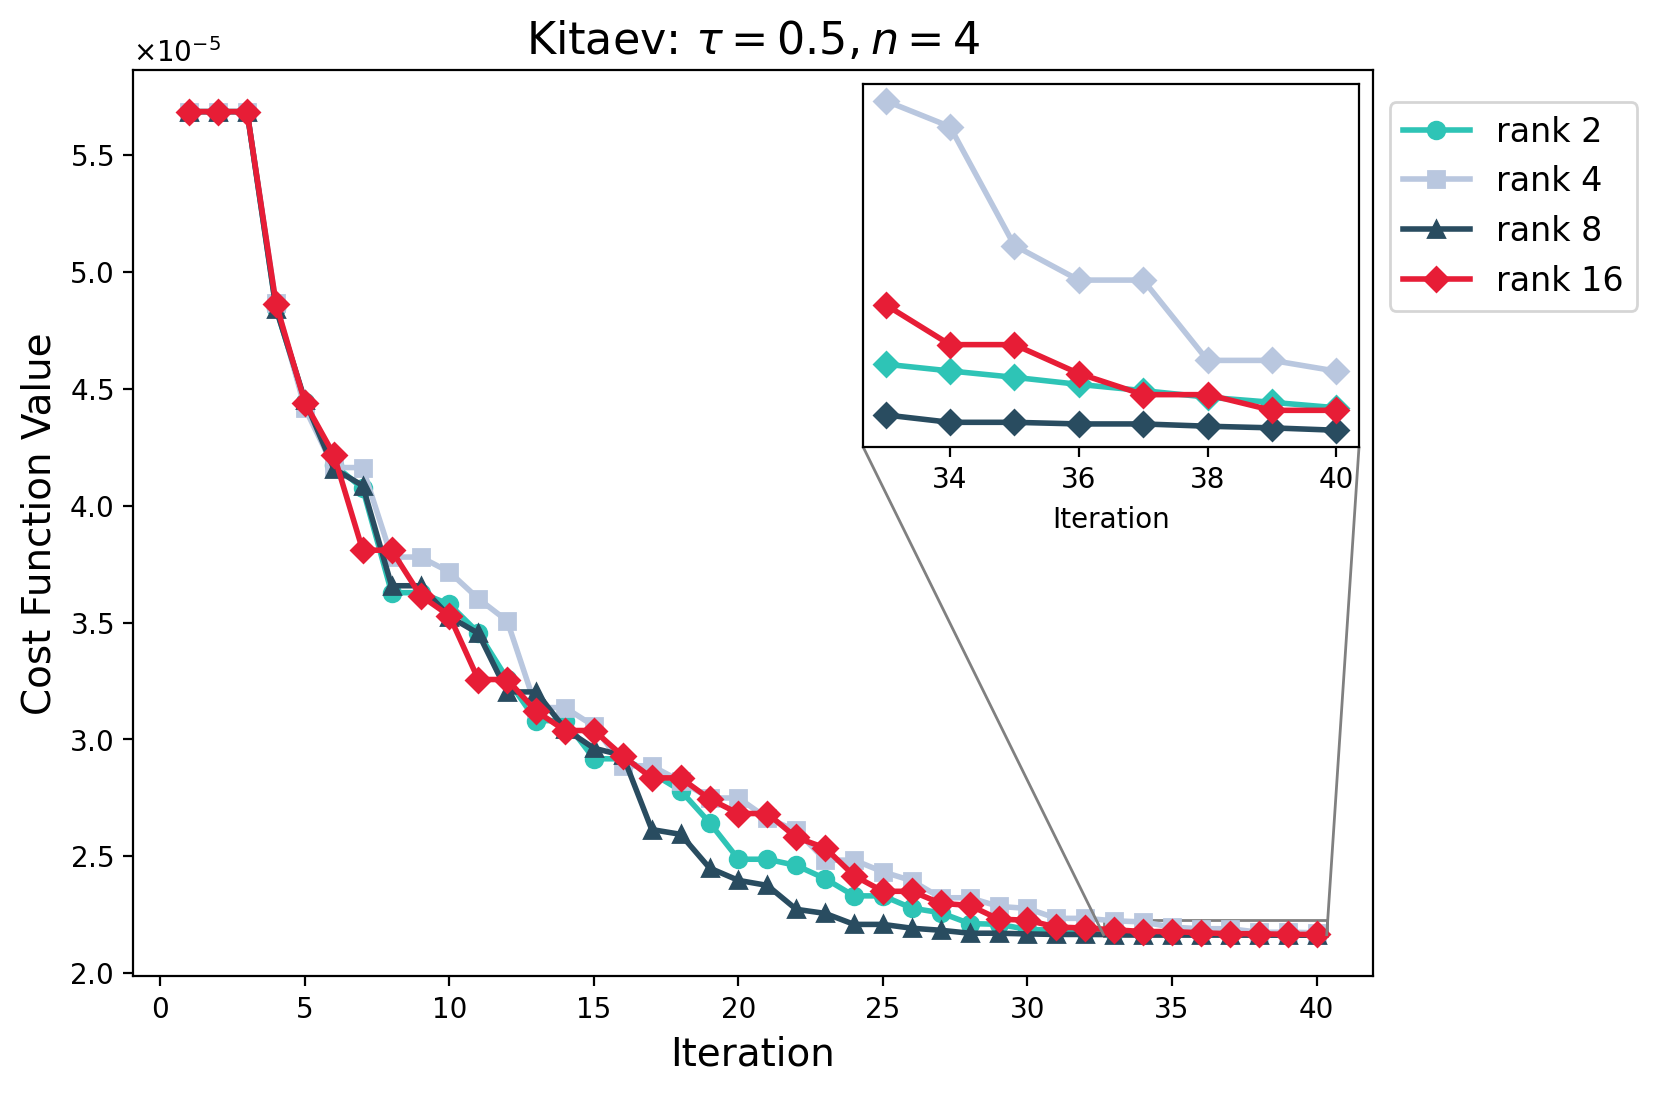

In [154]:
from opentn.utils import plot_pretty
f_kitaev_n4 = [f_rank2_opt, f_rank4_opt+f_rank4_opt_2+f_rank4_opt_3+f_rank4_opt_4, f_rank8_opt+f_rank8_opt_2+f_rank8_opt_3+f_rank8_opt_4, f_rank16_opt+f_rank16_opt_2+f_rank16_opt_3+f_rank16_opt_4+f_rank16_opt_5+f_rank16_opt_6]
labels = ["rank 2", "rank 4", "rank 8", "rank 16"]
title = r"Kitaev: $\tau = 0.5,  n = 4$"
comparison_value = f_rank2_opt[0]
fig = plot_pretty(f_kitaev_n4, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=True, comparison_value=None, optimize=False, inset=True, inset_idx=32)
# fig.savefig('../images/thesis/cost_ranks_kitaev_n4_2.pdf')

In [89]:
np.save(file="x_kitaev_n4_rank_16", arr=xs_rank16_opt_5[-1])
np.save(file="x_kitaev_n4_rank_8", arr=xs_rank8_opt_3[-1])
np.save(file="x_kitaev_n4_rank_4", arr=f_rank4_opt_4[-1])

In [90]:
np.save(file="f_kitaev_n4_rank_16", arr=np.array(f_kitaev_n4[-1]))
np.save(file="f_kitaev_n4_rank_8", arr=np.array(f_kitaev_n4[-2]))
np.save(file="f_kitaev_n4_rank_4", arr=np.array(f_kitaev_n4[-3]))


In [101]:
f_ratios = []
for f_iter in f_kitaev_n4:
    ratios = [f/f_iter[0] for f in f_iter]
    f_ratios.append(ratios)


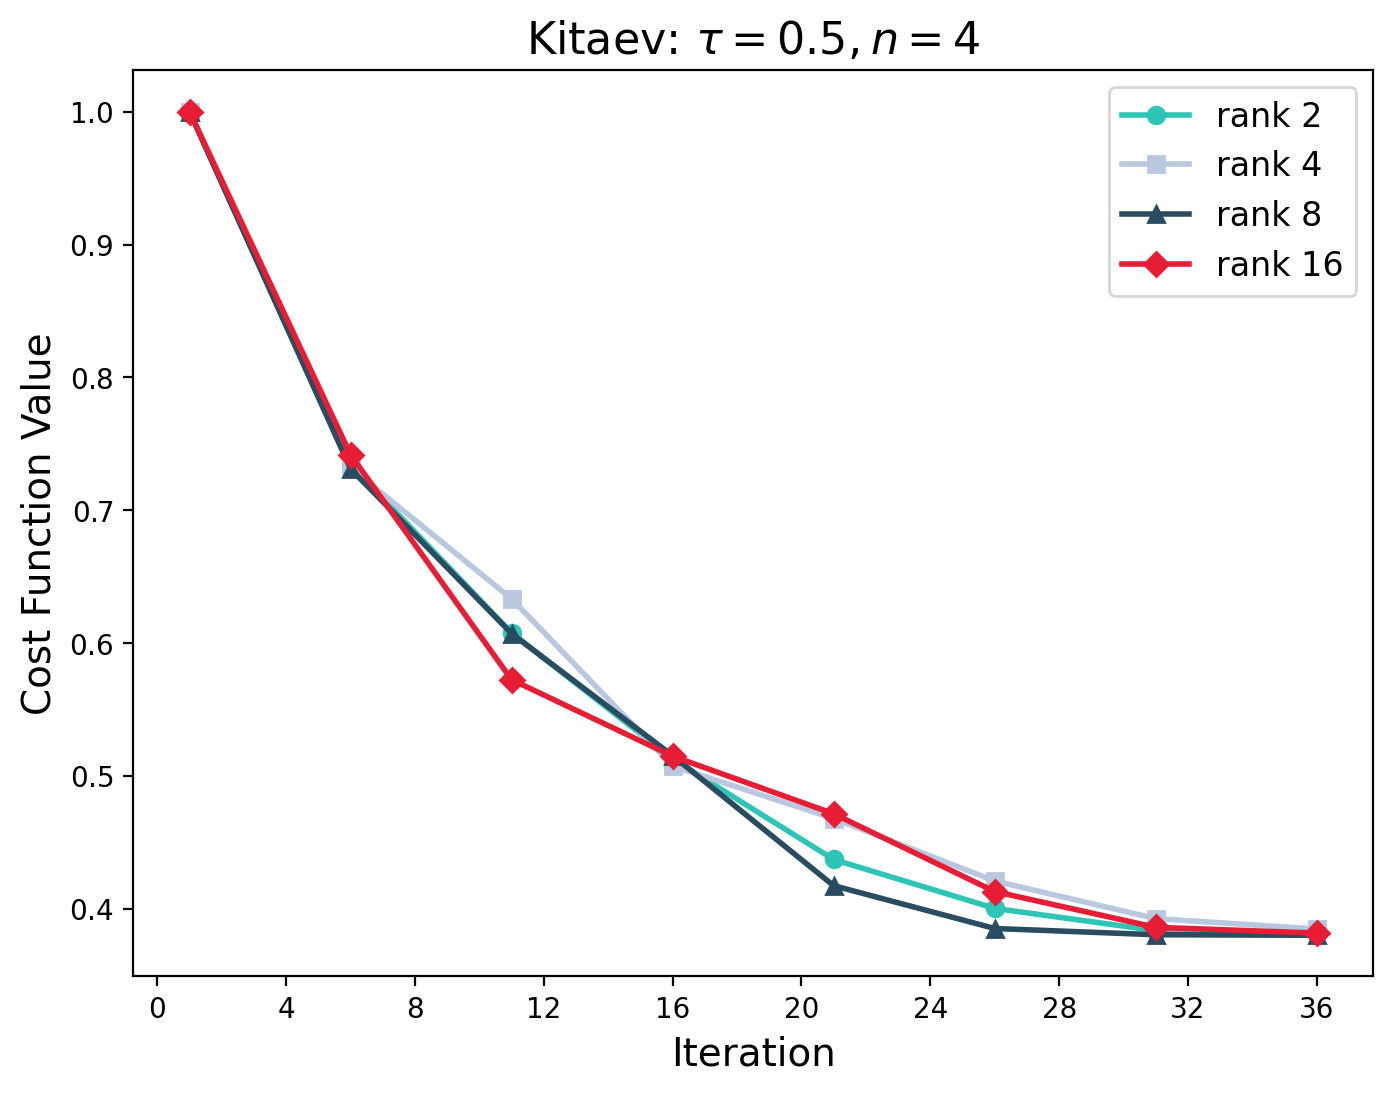

In [102]:
labels = ["rank 2", "rank 4", "rank 8", "rank 16"]
title = r"Kitaev: $\tau = 0.5,  n = 4$"
fig = plot_pretty(f_ratios, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False, optimize=True)